In [1]:
from image_processing import get_image, threshold_image, remove_lines, get_digits_batches, process_digits, predict
from model import get_model

### `1` Load the model

- Loads a pre-trained digit classification model from the given path if it exists.
- If not, trains a new CNN model on the full MNIST dataset, saves it, and returns it.

In [2]:
model = get_model(model_path='digit_model.h5')

Loading model from digit_model.h5...


### `2` Load the image

- Loads an image from the given path and converts it to grayscale.

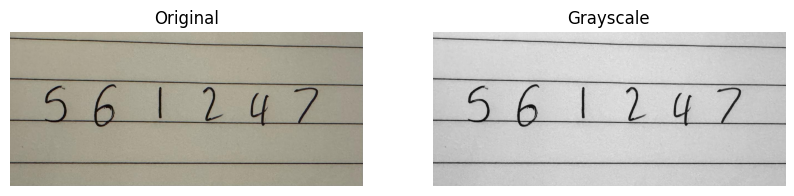

In [3]:
original_image, graysclae_image = get_image(image_path = 'images/digits.jpg')

### `3` Threshold the image

- Converts a grayscale image to a binary image using Otsu's method with inverse thresholding.

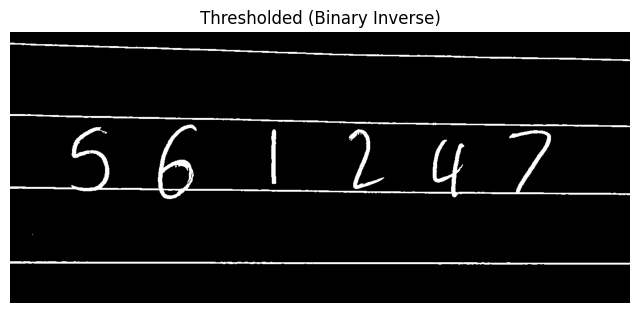

In [4]:
thresh_image = threshold_image(image = graysclae_image)

### `4` Remove lines (optional)

- Detects and removes horizontal lines from a binary image using morphological operations.
- Useful for cleaning scanned images with notebook or grid lines.

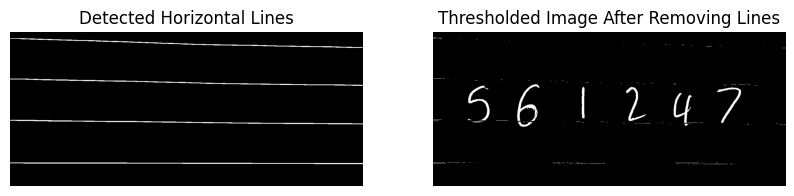

In [5]:
cleaned_image = remove_lines(image = thresh_image, kernel_size = (35, 1))

### `5` Detect digits

- Detects digit regions (batches) in the image using contour detection.
- Ignores regions whose height is below a threshold fraction of the tallest contour (to eliminate small noisy components).
- Returns the cropped digit images sorted from left to right.

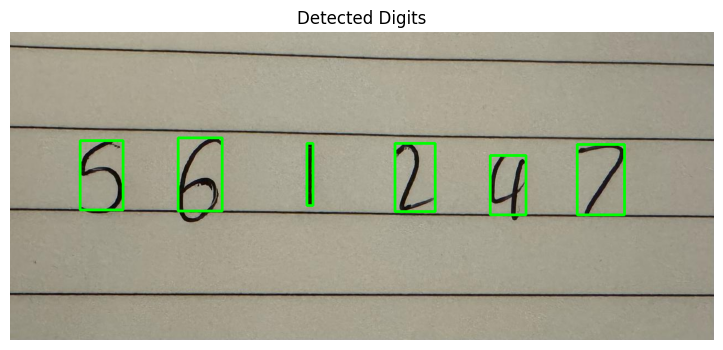

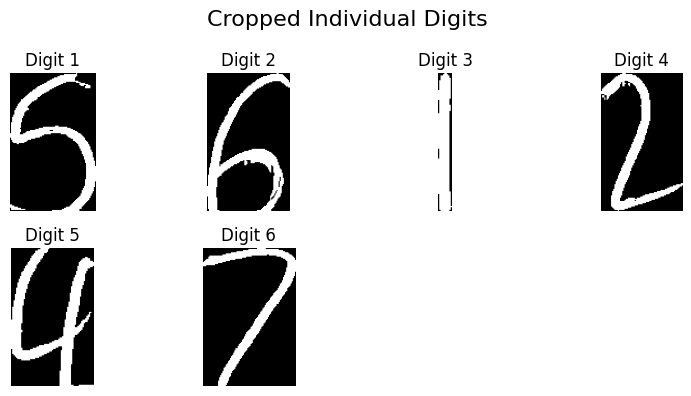

In [6]:
digits_batches = get_digits_batches(original_image = original_image, image = cleaned_image, highet_thresh = 0.5)

### `6` Process digits
- Processes a list of digit images by resizing, padding, and normalizing them for model input.
- Each digit is resized to a height of 24 pixels, padded to $28 \times 28$, and normalized to [0, 1].
- Optionally thickens the digits using morphological dilation.
- Returns the processed digits as a NumPy array shaped for CNN input.

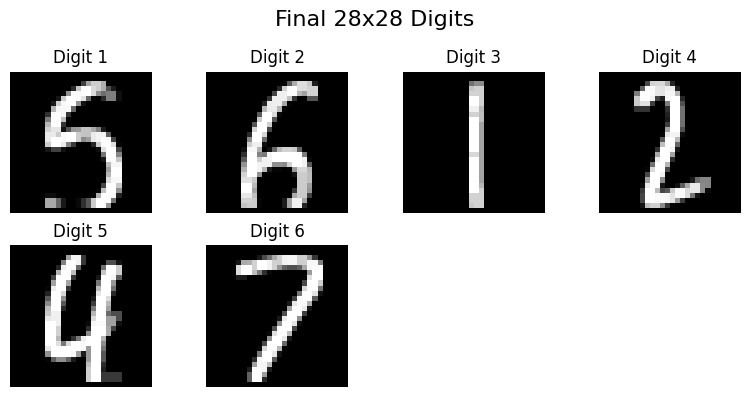

In [9]:
processed_digits = process_digits(digits_batches = digits_batches, thicken = True)

### `7` Model prediction
- Uses the trained model to predict digits from the processed images.
- Combines the predictions into a final number and displays it with the original image.

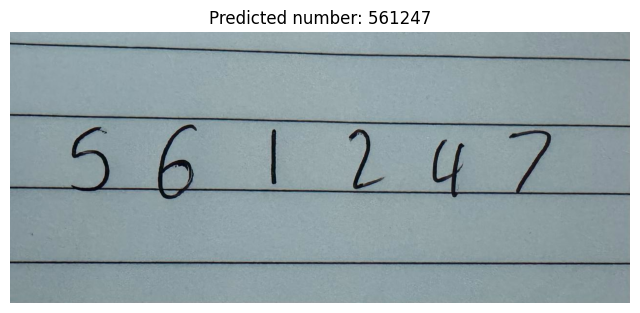

In [8]:
prediction = predict(processed_digits = processed_digits, model = model, image = original_image)